In [173]:
#!pip install easyocr
#!pip install imutils

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr


# Reading an Image

In [175]:
img = cv2.imread('car.png')

In [176]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

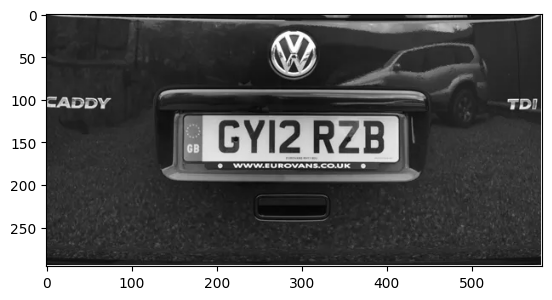

In [177]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [178]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [179]:
edged = cv2.Canny(bfilter, 30, 200)

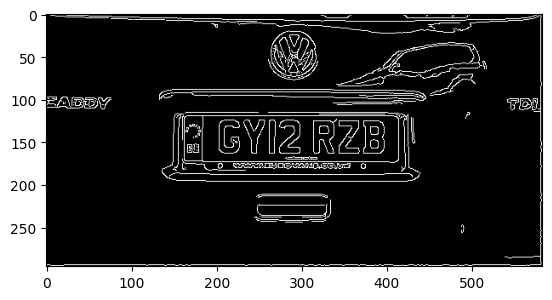

In [180]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [181]:
keypoints,hierachy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Ideally, in number plate recognition, we should get 4 key points from contour

In [182]:
contours = keypoints

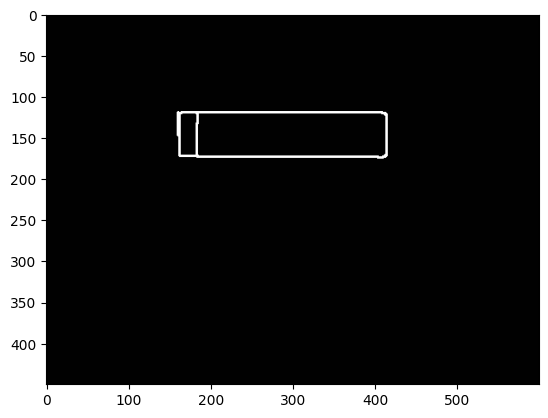

In [183]:
# Create a blank image
blank_image = np.ones((450,600,3), np.uint8)
 
# Set the minimum area for a contour
min_area = 5000
 
# Draw the contours on the original image and the blank image
for c in contours:
    area = cv2.contourArea(c)
    if area > min_area:
        cv2.drawContours(blank_image,[c], 0, (255,255,255), 2)

plt.imshow(blank_image)

In [184]:
len(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
len(contours)

10

In [185]:
location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  print("approx",approx)
  print("len",len(approx))
  if len(approx) == 4:
    location = approx
    break

approx [[[160 120]]

 [[163 172]]

 [[414 171]]

 [[408 119]]]
len 4


In [186]:
mask = np.zeros(gray.shape, np.uint8)

In [187]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

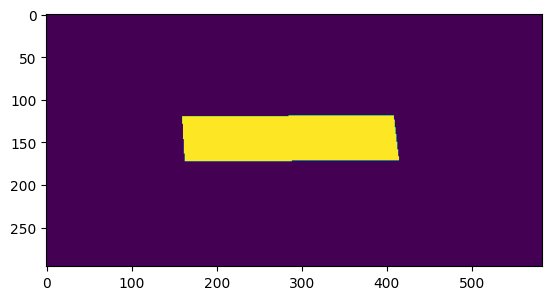

In [188]:
plt.imshow(new_image)

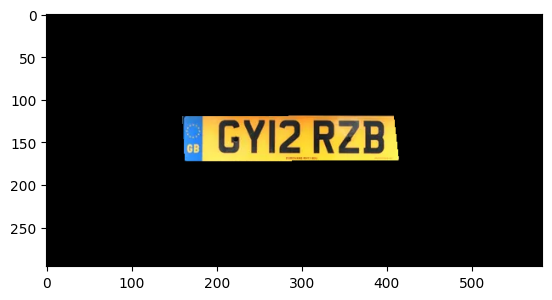

In [189]:
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

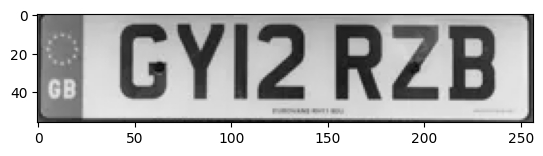

In [190]:
(x, y) = np.where(mask != 0)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [191]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

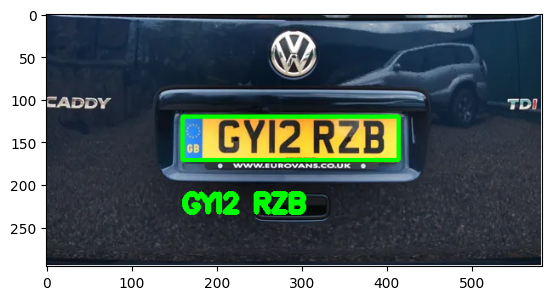

In [192]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))